In [2]:
import pandas as pd
import numpy as np
from vmdpy import VMD


In [3]:
file_path  = r"Machine_#1_Mecatis\Machine_#1_Mecatis\Warmup_Mecatis_03_02_25\stSigAxCurrentB.csv"

df = pd.read_csv(file_path,sep=";", header=None)

In [4]:
df.head()

,0,1
0,133830456135230000,0.1719
1,133830456135222000,0.1710
2,133830456135214000,0.1703
3,133830456135206000,0.1718
4,133830456135198000,0.1718


In [5]:
df = df.sort_values(by=0)
df.head()

,0,1
148,133830456134046000,0.1531
147,133830456134054000,0.1564
146,133830456134062000,0.1569
145,133830456134070000,0.1561
144,133830456134078000,0.1449


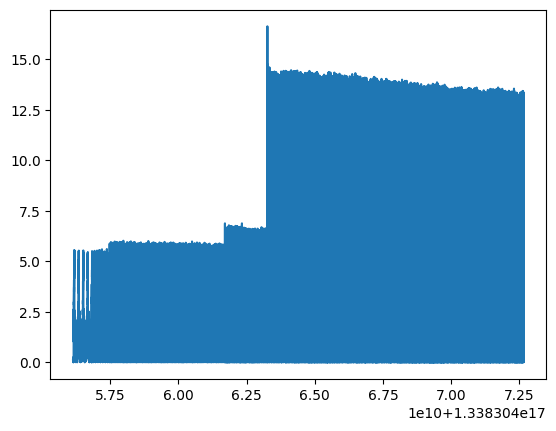

In [6]:
import matplotlib.pyplot as plt

plt.plot(df[0],df[1])
plt.show()

In [7]:
def progressive_vmd(signal, fs=None, window_size=20000, overlap=0.5, K=3, alpha=2000, tau=0., DC=0, init=1, tol=1e-6):
    step = int(window_size * (1 - overlap))
    results = []

    for start in range(0, len(signal) - window_size + 1, step):
        segment = signal[start:start+window_size]
        segment = np.asarray(segment).flatten()

        try:
            u, u_hat, omega = VMD(segment, alpha, tau, K, DC, init, tol)
            results.append({
                "start": start,
                "end": start+window_size,
                "modes": u,
                "frequencies": omega
            })
        except MemoryError:
            print(f"⚠️ Mémoire insuffisante pour le segment {start}–{start+window_size}")
            continue

    return results

In [8]:
signal = df[1].to_numpy().flatten()

results=progressive_vmd(signal)

print(results)

[{'start': 0, 'end': 20000, 'modes': array([[ 1.54600668e-01,  1.54628722e-01,  1.54627836e-01, ...,
         7.89236674e-01,  7.89163755e-01,  7.89146384e-01],
       [-1.52078619e-04,  5.73310784e-04,  1.01426215e-03, ...,
         9.00573048e-04, -8.37257646e-05, -9.40868634e-04],
       [ 3.34296143e-04, -6.31162420e-04,  9.74183297e-05, ...,
         3.21385567e-03, -4.33316617e-03,  1.95024830e-03]],
      shape=(3, 20000)), 'frequencies': array([[0.00000000e+00, 1.66666667e-01, 3.33333333e-01],
       [4.48255650e-05, 1.66024103e-01, 3.34111481e-01],
       [4.47525399e-05, 1.65124711e-01, 3.34707819e-01],
       [4.47513600e-05, 1.64143483e-01, 3.35200655e-01],
       [4.47503471e-05, 1.63061626e-01, 3.35605178e-01],
       [4.47492027e-05, 1.61857058e-01, 3.35934845e-01],
       [4.47478974e-05, 1.60500925e-01, 3.36201542e-01],
       [4.47463951e-05, 1.58955325e-01, 3.36415529e-01],
       [4.47446457e-05, 1.57170893e-01, 3.36585489e-01],
       [4.47425806e-05, 1.55085884e-0